# NYC measles cases by vaccination status (2018-2019 outbreak)

* This Jupyter/Python notebook creates a bar chart of the 2018-2019 NYC measles outbreak cases by vaccination status.
* This notebook is part of the [Visualizing the 2019 Measles Outbreak](https://carlos-afonso.github.io/measles/) open-source GitHub project.
* [Carlos Afonso](https://www.linkedin.com/in/carlos-afonso-w/), Jan 4, 2020.

## Import libraries

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import os
import pandas as pd

## Read and show the data

The data has been manually collected/updated from the source ([NYC Health Measles webpage](https://www1.nyc.gov/site/doh/health/health-topics/measles.page)) and saved as a [CSV file](https://github.com/carlos-afonso/measles/blob/master/data/nyc-health/2018-2019-outbreak/nyc-measles-cases-by-vaccination-status.csv). This manual approach was used because the data is small.

In [2]:
# Set (relative) path to the CSV data file
data_file = os.path.join('..', 'data', 'nyc-health', '2018-2019-outbreak', 'nyc-measles-cases-by-vaccination-status.csv')

# Import data from the CSV file as a pandas dataframe
df = pd.read_csv(data_file)

# Show the data
df

,Start Date,End Date,Unvaccinated,One Prior MMR,Two Prior MMR,Unknown MMR,Total
0,2018-09-01,2019-08-19,477,47,31,94,649


## Extract context information

We want to show the start and end dates in the plot, to provide context. We use just the month information for consistency across the other data visualizations, especially the "NYC new case by month", and also to avoid cluttering.

In [3]:
# Notes about the lambda function below:
# 1) strptime transforms the raw date string to a datetime object
# 2) strftime transforms the datetime object to a nicelly formatted date string
[start_month, end_month] = map(
    lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%b %Y'),
    df.iloc[0, :2]
)

# Show the nicelly formated date strings
[start_month, end_month]

['Sep 2018', 'Aug 2019']

We also want to show the total number of cases in the plot, to provide context.

In [4]:
# Get the number of total cases (last row, last column)
total_cases = df.iloc[0, -1]

# Check if there is a problem with the data where the reported total
# does not match the sum of the number of cases for each age group
if total_cases != df.iloc[0, 2:-1].sum():
    print('WARNING: cases for each age group do NOT add up to the reported total!')

# Show the total cases
total_cases

649

## Extract the data to plot

In [5]:
# Extract the data to plot
data_to_plot = df.iloc[-1, 2:-1]

# Show the data to plot
data_to_plot

Unvaccinated     477
One Prior MMR     47
Two Prior MMR     31
Unknown MMR       94
Name: 0, dtype: object

## Create bar chart

We want the bar chart to be clear and to contain the necessary context.

To contextualize the bar chart we:
* use a title that explictly says what the bar chart represents;
* add text annotations that provides information about:
    * the start and end dates,
    * the total number of cases during that period, and
    * the data and image sources.

To make the bar chart as clear as possible we:
* use an horizontal bar chart because it is easier to read than a vertical one;
* explicitly show the number and percentage of cases for each age group;
* use a large enough font to make all labels easy to read;
* remove unnecessary elements (x-axis ticks and values, y-axis ticks, and plot box).

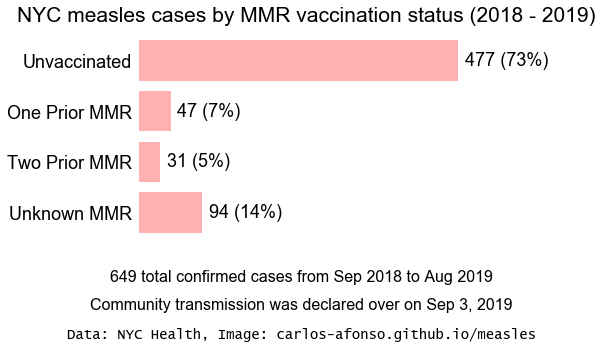

In [6]:
# Define font parameters
fn = 'Arial' # font name
fsb = 18     # font size base

# Create figure
fig = plt.figure()

# Add "figure title"
#fig.suptitle('NYC measles cases by MMR vaccination status', fontname=fn, fontsize=(fsb + 4))
plt.title('NYC measles cases by MMR vaccination status (2018 - 2019)', fontname=fn, fontsize=(fsb + 3))

# Create the horizontal bar chart
ax = data_to_plot.plot.barh(alpha=0.3, color='red', width=0.8)

# Invert the y-axis
ax.invert_yaxis()

# Remove the x-axis ticks and values
ax.get_xaxis().set_ticks([])

# Remove the y-axis ticks only (keep the labels)
ax.yaxis.set_ticks_position('none')

# Set the y-axis labels font properties
ax.set_yticklabels(data_to_plot.keys(), fontname=fn, fontsize=fsb)

# Create labels in front of the bars showing the number and percentage of cases.
# Note: we round the percentages to the nearest integer.
for i in ax.patches:
    label = str(i.get_width()) + " (" + str(int(round(100 * i.get_width() / total_cases))) + "%)"
    ax.text(i.get_width() + 10, i.get_y() + 0.5, label, fontname=fn, fontsize=fsb)

# Remove the axes box
plt.box(False)

# Add note about the total cases
text = str(total_cases) + ' total confirmed cases from ' + start_month + ' to ' + end_month
fig.text(0.5, 0.0, text, fontname = fn, fontsize = (fsb - 2), horizontalalignment='center')

# Add note about the end of the outbreak
text = 'Community transmission was declared over on Sep 3, 2019'
fig.text(0.5, -0.1, text, fontname = fn, fontsize = (fsb - 2), horizontalalignment='center')

# Add note about the Data and Image sources
sources = 'Data: NYC Health, Image: carlos-afonso.github.io/measles'
fig.text(0.5, -0.2, sources, fontname='Lucida Console', fontsize=(fsb - 4), horizontalalignment='center')

# Show figure
plt.show()

## Save bar chart

In [7]:
# Set image file path/name (without file extension)
img_file = os.path.join('..', 'images', 'nyc-measles-cases-by-vaccination-status-bar-chart-py')

# Save as PNG image
fig.savefig(img_file + '.png', bbox_inches='tight', dpi=200)

# Save as SVG image
fig.savefig(img_file + '.svg', bbox_inches='tight')

## Export notebook as HTML

In [8]:
# Export this notebook as a static HTML page
os.system('jupyter nbconvert --to html nyc-measles-cases-by-vaccination-status-final.ipynb')

0